In [3]:
import csv
import warnings as wgs
wgs.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from pmdarima import auto_arima

In [4]:
file = open(r'C:\Users\33656\Documents\IAschool\Data Sciences\BPD_Part_1_Victim_Based_Crime_Data.csv')
file

<_io.TextIOWrapper name='C:\\Users\\33656\\Documents\\IAschool\\Data Sciences\\BPD_Part_1_Victim_Based_Crime_Data.csv' mode='r' encoding='cp1252'>

In [5]:
csvreader = csv.reader(file)

In [6]:
header = []
header = next(csvreader)
header


['CrimeDate',
 'CrimeTime',
 'CrimeCode',
 'Location',
 'Description',
 'Inside/Outside',
 'Weapon',
 'Post',
 'District',
 'Neighborhood',
 'Location 1',
 'Total Incidents']

In [7]:
rows = []
for row in csvreader:
        rows.append(row)
rows


[['11/12/2016',
  '02:35:00',
  '3B',
  '300 SAINT PAUL PL',
  'ROBBERY - STREET',
  'O',
  '',
  '111',
  'CENTRAL',
  'Downtown',
  '(39.2924100000, -76.6140800000)',
  '1'],
 ['11/12/2016',
  '02:56:00',
  '3CF',
  '800 S BROADWAY',
  'ROBBERY - COMMERCIAL',
  'I',
  'FIREARM',
  '213',
  'SOUTHEASTERN',
  'Fells Point',
  '(39.2824200000, -76.5928800000)',
  '1'],
 ['11/12/2016',
  '03:00:00',
  '6D',
  '1500 PENTWOOD RD',
  'LARCENY FROM AUTO',
  'O',
  '',
  '413',
  'NORTHEASTERN',
  'Stonewood-Pentwood-Winston',
  '(39.3480500000, -76.5883400000)',
  '1'],
 ['11/12/2016',
  '03:00:00',
  '6D',
  '6600 MILTON LN',
  'LARCENY FROM AUTO',
  'O',
  '',
  '424',
  'NORTHEASTERN',
  'Westfield',
  '(39.3626300000, -76.5516100000)',
  '1'],
 ['11/12/2016',
  '03:00:00',
  '6E',
  '300 W BALTIMORE ST',
  'LARCENY',
  'O',
  '',
  '111',
  'CENTRAL',
  'Downtown',
  '(39.2893800000, -76.6197100000)',
  '1'],
 ['11/12/2016',
  '03:00:00',
  '4E',
  '6900 MCCLEAN BLVD',
  'COMMON ASSAULT'

In [8]:
data=pd.DataFrame(rows)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,,111,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,,413,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,,424,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,,111,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
265591,06/06/2011,22:00:00,6D,2100 FLEET ST,LARCENY FROM AUTO,O,,232,SOUTHEASTERN,Canton,"(39.2848500000, -76.5869400000)",1
265592,06/06/2011,22:00:00,7C,2000 WOODBOURNE AV,AUTO THEFT,O,,415,NORTHEASTERN,Perring Loch,"(39.3544000000, -76.5776300000)",1
265593,06/06/2011,22:30:00,6D,200 E REDWOOD ST,LARCENY FROM AUTO,O,,111,CENTRAL,Downtown,"(39.2889200000, -76.6121700000)",1
265594,06/06/2011,22:35:00,4A,4100 FAIRVIEW AV,AGG. ASSAULT,,FIREARM,641,NORTHWESTERN,West Forest Park,"(39.3224100000, -76.6877300000)",1


In [9]:
data.columns=header

In [10]:
data

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,,111,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,,413,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,,424,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,,111,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
265591,06/06/2011,22:00:00,6D,2100 FLEET ST,LARCENY FROM AUTO,O,,232,SOUTHEASTERN,Canton,"(39.2848500000, -76.5869400000)",1
265592,06/06/2011,22:00:00,7C,2000 WOODBOURNE AV,AUTO THEFT,O,,415,NORTHEASTERN,Perring Loch,"(39.3544000000, -76.5776300000)",1
265593,06/06/2011,22:30:00,6D,200 E REDWOOD ST,LARCENY FROM AUTO,O,,111,CENTRAL,Downtown,"(39.2889200000, -76.6121700000)",1
265594,06/06/2011,22:35:00,4A,4100 FAIRVIEW AV,AGG. ASSAULT,,FIREARM,641,NORTHWESTERN,West Forest Park,"(39.3224100000, -76.6877300000)",1


In [11]:
for j in header:
    print(j)

CrimeDate
CrimeTime
CrimeCode
Location
Description
Inside/Outside
Weapon
Post
District
Neighborhood
Location 1
Total Incidents


In [12]:
############### Conversion des types de données #################


data['CrimeDate']=data['CrimeDate'].copy().astype('datetime64')
data['CrimeCode']=data['CrimeCode'].copy().astype(str)
data['Location']=data['Location'].copy().astype(str)
data['Inside/Outside']=data['Inside/Outside'].copy().astype(str)
data['Description']=data['Description'].copy().astype(str)
data['Weapon']=data['Weapon'].copy().astype(str)
data['District']=data['District'].copy().astype(str)
data['District']=data['Neighborhood'].copy().astype(str)
data['Total Incidents']=data['Total Incidents'].copy().astype(float)
data['Post'] = pd.to_numeric(data['Post'].copy(),errors='coerce')


In [13]:
date_nombre_crimes=data[['Total Incidents','CrimeDate']].groupby('CrimeDate').sum()
date_nombre_crimes.to_csv("Crimes-USA.csv")

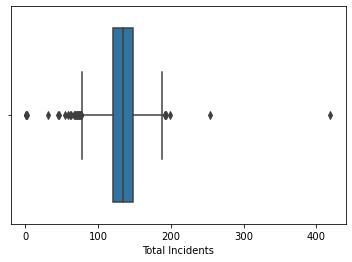

In [14]:
#################### boxplot #############
#sns.set_theme(style="whitegrid")
ax = sns.boxplot(date_nombre_crimes['Total Incidents'])


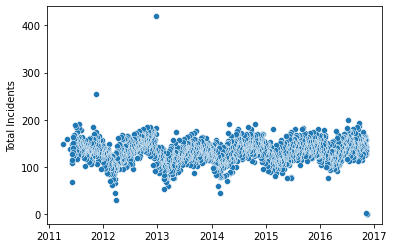

In [15]:
ax = sns.scatterplot(data['CrimeDate'].unique(),date_nombre_crimes['Total Incidents'])


<AxesSubplot:xlabel='CrimeDate'>

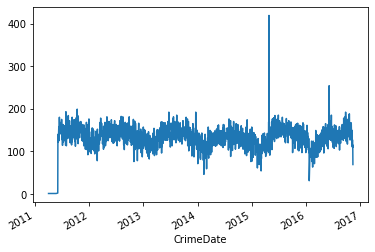

In [16]:
############### Graphes des crimes #################
date_nombre_crimes['Total Incidents'].plot()

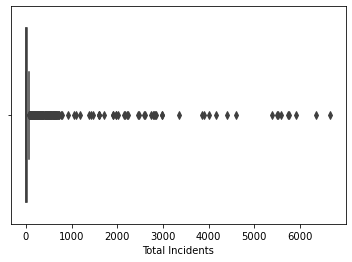

In [17]:
############### Boxplot des crimes #################

nombre_crimes_H=pd.concat([data['CrimeTime'],data['Total Incidents']],axis=1)
v=nombre_crimes_H.groupby('CrimeTime').sum()
ax = sns.boxplot(v['Total Incidents'])

<AxesSubplot:xlabel='CrimeTime'>

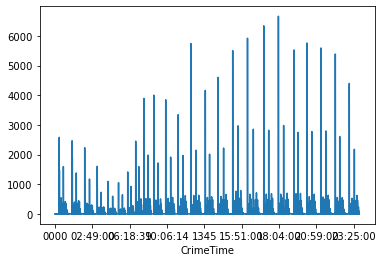

In [18]:
############### Graphes des Incendies #################

v['Total Incidents'].plot()

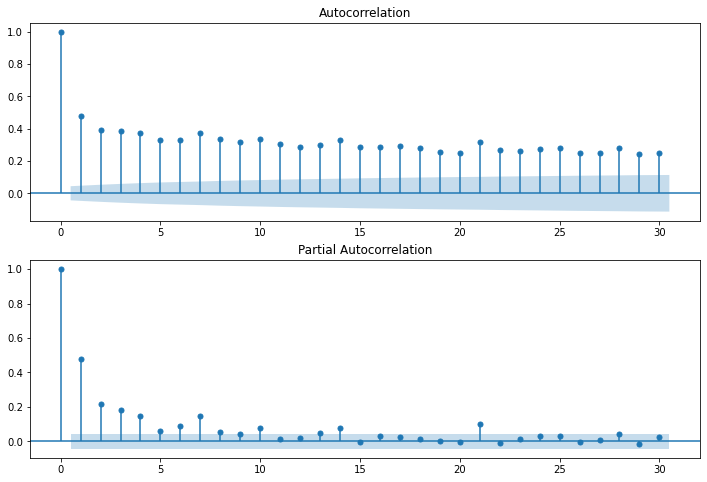

In [19]:
################## Graphes des autocorrélations ########################
dat=date_nombre_crimes
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(dat, lags=30, ax=ax1,)
ax2 = fig.add_subplot(212)
fig = plot_pacf(dat, lags=30, ax=ax2);


In [20]:
############### Teste adfuller Augmenté #################

result = adfuller(dat,autolag='AIC')
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -4.054206644058005
p-value : 0.0011518086437342142
Valeurs Critiques :
	1%: -3.43367377729942
	5%: -2.863008253581611
	10%: -2.5675516375067637


La stationnarité de la données est établie.

############### Choix automatique du meilleur modèle Arima #################


In [21]:

steps=auto_arima(dat,start_p=0,start_q=0,max_p=4,max_q=4,trace=True);
steps

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18306.750, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17912.061, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17470.164, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18304.754, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17447.929, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17449.927, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17449.925, Time=1.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17448.177, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17711.705, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17451.926, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17446.046, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17468.284, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=17910.076, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=17448.044, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

################# Entrainement du modèle #############


c:\Users\33656\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\33656\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


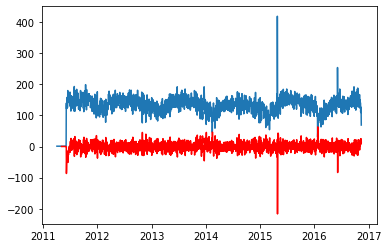

In [22]:

model = ARIMA(dat, order = (1,1,1))
results = model.fit(disp=-1)
plt.plot(dat)
plt.plot(results.fittedvalues, color='red')

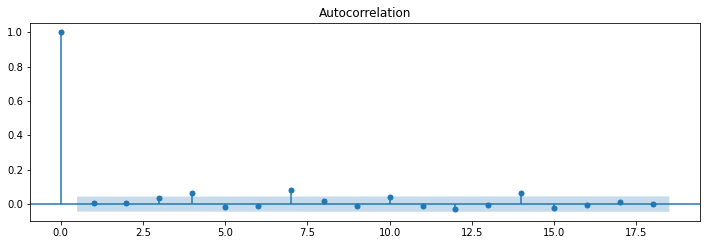

In [23]:
res=results.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(res, lags=18, ax=ax1,)

############### Diagnostic de l'étude #################

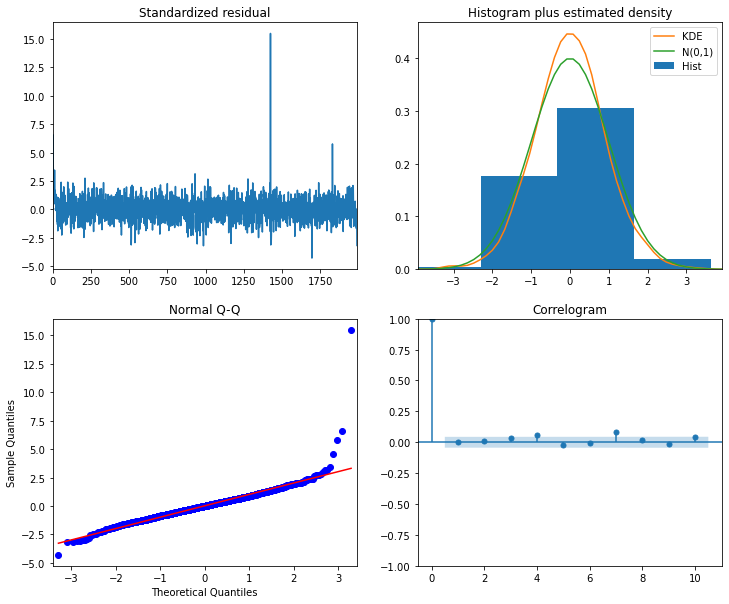

In [24]:


steps.plot_diagnostics(figsize=(12, 10))
plt.show()

In [25]:

acorr_ljungbox(steps.resid(),lags=[1], return_df=True)


,lb_stat,lb_pvalue
1,0.084747,0.770965


Le teste de ljungbox nous donne des résidus parfaitement décorrélés nous avons donc un bruit blanc.

In [26]:
steps.plot_predict(1,2800);

AttributeError: 'ARIMA' object has no attribute 'plot_predict'

CALCUL DES DECALAGES TEMPORELS

Il s'agit ici de calculer les décalages sur quatre périodes en vue de permettre la prediction avec le machine learning.

In [27]:
lag = 8
X = lagmat(dat['Total Incidents'], lag)
lagged = dat.copy()
for c in range(1,lag+1):
    lagged["lag%d" % c] = X[:, c-1]
lagged.tail()


,Total Incidents,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
CrimeDate,,,,,,,,,
2016-11-08,111.0,132.0,141.0,123.0,150.0,134.0,149.0,164.0,167.0
2016-11-09,127.0,111.0,132.0,141.0,123.0,150.0,134.0,149.0,164.0
2016-11-10,109.0,127.0,111.0,132.0,141.0,123.0,150.0,134.0,149.0
2016-11-11,115.0,109.0,127.0,111.0,132.0,141.0,123.0,150.0,134.0
2016-11-12,69.0,115.0,109.0,127.0,111.0,132.0,141.0,123.0,150.0


In [28]:
X=lagged.iloc[5:].copy().drop('Total Incidents',axis=1)
Y=lagged.iloc[5:].copy()['Total Incidents']

Prédiction des séries temporelles avec du machine learning. 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [30]:
######################## REGRESSION LINEAIRE##############
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [31]:
clr = LinearRegression()
resultats=clr.fit(X_train,y_train)
pred=resultats.predict(X_test)

In [32]:
R_carre=r2_score(y_test,pred)
R_carre

0.37411901093196853

In [33]:
#################### Regression de ridge avec validation croisée ##################
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [34]:
ridge_cv_model = RidgeCV(alphas=np.linspace(0.1,1,10000),)

In [35]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([0.1       , 0.10009001, 0.10018002, ..., 0.99981998, 0.99990999,
       1.        ]))

In [36]:
ridge_cv_model.alpha_

1.0

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [38]:
test_predictions=ridge_cv_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
pd.DataFrame({"MAE": MAE,"MSE":MSE, "RMSE":RMSE},index=["Erreurs"])

,MAE,MSE,RMSE
Erreurs,14.170988,320.976263,17.91581


In [39]:
r2_score(y_test,test_predictions)

0.37411903610191133

In [40]:
# Performance sur Training Set
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

13.867158484555627

In [42]:
#################### Refgression de Lasso avec validation croisée ##################
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [43]:
lasso_cv_model.alpha_

23.928365924534774

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)
test_predictions

In [47]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
MAE,MSE,RMSE

(14.312999410318787, 324.9482248927083, 18.02632033701577)

In [48]:
# Performance sur Training Set
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

13.959949651327328